In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.formula.api import ols

sns.set(style="whitegrid")

In [2]:
# IMPORT CSV FILE
df_old = pd.read_csv('Toddler Autism dataset July 2018.csv')

In [3]:
df_old.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

## Questions for QChat10 (Columns A1 - A10)

A1	 Does your child look at you when you call his/her name?

A2	How easy is it for you to get eye contact with your child?

A3	Does your child point to indicate that s/he wants something?
    (e.g. a toy that is out of reach)
    
A4	Does your child point to share interest with you? (e.g. 
    pointing at an interesing sight)
    
A5	Does your child pretend? (e.g. care for dolls, talk on a toy 
    phone)
    
A6	Does your child follow where you’re looking?

A7	If you or someone else in the family is visibly upset, does 
    your child show signs of wanting to comfort them? (e.g. 
    stroking hair, hugging them)
    
A8	Would you describe your child’s first words as: (0:My child 
    doesn't speak 1:Very typical)
    
A9	Does your child use simple gestures? (e.g. wave goodbye)

A10	Does your child stare at nothing with no apparent purpose?


In [4]:
# RENAME COLUMNS TO MAKE ANALYSES EASIER
df = df_old.rename(columns={'Age_Mons': 'Age', 'Qchat-10-Score':'qchat_score', 'Family_mem_with_ASD':'family_asd', 'Class/ASD Traits ':'asd_traits'})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
# SELECT ONLY "YES" VALUES FOR TARGET VARIABLE
df = df[df['asd_traits'] != 'No']
df.shape

(728, 19)

In [6]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes


In [7]:
# CREATE DUMMY VARIABLES OF CATEGORICAL VARIABLES FOR REGRESSION
df = pd.get_dummies(df, columns=['Ethnicity','Jaundice','Sex','family_asd','asd_traits'], drop_first=True)
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age', 'qchat_score', 'Who completed the test', 'Ethnicity_Latino',
       'Ethnicity_Native Indian', 'Ethnicity_Others', 'Ethnicity_Pacifica',
       'Ethnicity_White European', 'Ethnicity_asian', 'Ethnicity_black',
       'Ethnicity_middle eastern', 'Ethnicity_mixed', 'Ethnicity_south asian',
       'Jaundice_yes', 'Sex_m', 'family_asd_yes'],
      dtype='object')

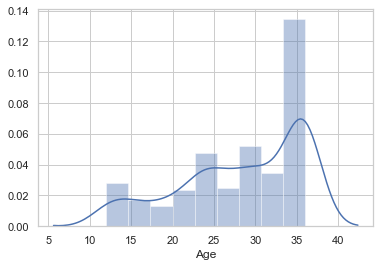

In [8]:
sns.distplot(df.Age)

## Multi Linear Regression Model on features A1-A10

In [9]:
# DEFINE FEATURES AND TARGET VARIABLE
features = ['A1', 'A2','A3','A4','A5','A6','A7','A8','A9','A10']
df_features = df[features]
target = df['Age']

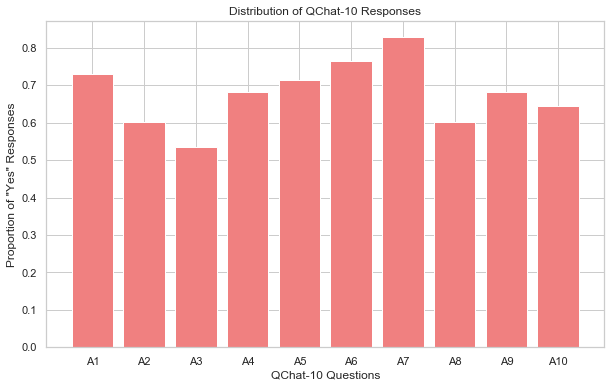

In [10]:
y = df_features.mean()
x = y.index

fig,ax=plt.subplots(figsize=(10,6))
plt.bar(x,y,color="lightcoral")
plt.title('Distribution of QChat-10 Responses')
plt.xlabel('QChat-10 Questions')
plt.ylabel('Proportion of "Yes" Responses');

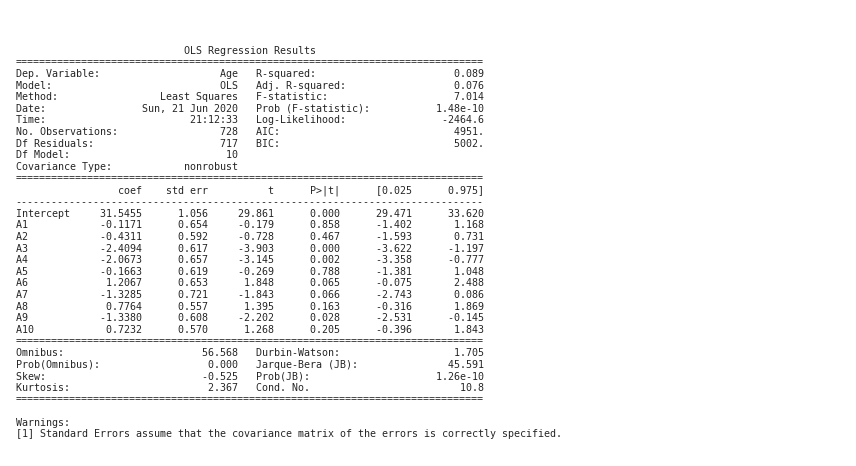

In [11]:
# OLS MODEL OF A1-A10 ON AGE
mlr_model = ols(formula='Age~A1+A2+A3+A4+A5+A6+A7+A8+A9+A10', data=df).fit()
mlr_model.summary()
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(mlr_model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
# plt.savefig('ols_model_A1A10.png')

In [12]:
# SPLIT DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=22,test_size=0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (582, 10) Target:  (582,)
Training set - Features:  (146, 10) Target:  (146,)


In [13]:
# SCALE DATA AND TRANSFORM TRAINING/TESTING DATA
scaler = StandardScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [14]:
price_std = target.std()
# INSTANTIATE LINEAR REGRESSION OBJECT AND FIT OBJECT TO DATA, CALCULATE RMSE AND ZSCORE
lm = LinearRegression()

lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print ("R^2 Score:", lm.score(X_train, y_train))
print('Mean Absolute Error  Z:', train_rmse/price_std )
print('Training Root Mean Squared Error:' , train_rmse)

R^2 Score: 0.10773492167221899
Mean Absolute Error  Z: 0.942683052084798
Training Root Mean Squared Error: 7.062576891045197


### Evaluate on the test set

In [15]:
# USE MODEL TO PREDICT TESTING DATA AND CALCULATE RMSE
y_pred = lm.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 7.58025311240337
Training:  7 vs. Testing:  7


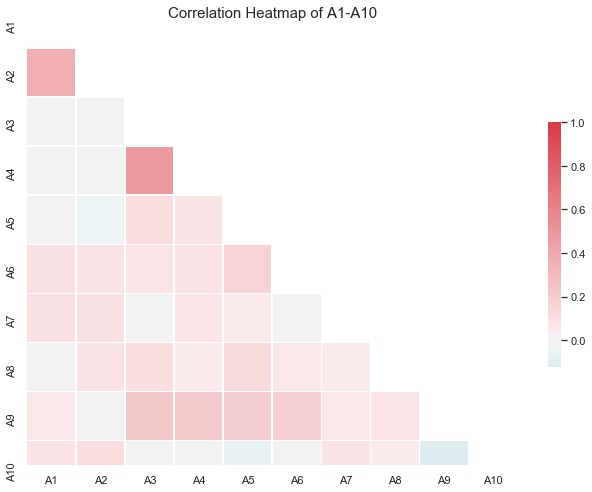

In [16]:
# CORRELATION MAP OF A1-A10
sns.set(style="white")
corr = X_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of A1-A10',fontsize=15)
plt.savefig('A1A10_heatmap');

## Feature Selection : F-test

In [17]:
# IMPORT NECESSARY LIBRARIES AND RUN REGRESSION ON XTRAIN AND YTRAIN TO SELECT TOP 3 FEATURES
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=3)
#run regression on x train and y train and return top 15 features
selector.fit(X_train, y_train)

SelectKBest(k=3, score_func=<function f_regression at 0x1a213eea60>)

In [18]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [19]:
list(selected_columns)

['A3', 'A4', 'A9']

In [20]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

Training Root Mean Squared Error: 7.154102005736333
Testing Root Mean Squared Error: 7.388176373208773
Original:  7.58025311240337 vs. KBest:  7.388176373208773


In [21]:
print(lm_kbest.intercept_)
print(lm_kbest.coef_)

28.280068728522338
[-1.38920669 -0.81313493 -0.646761  ]


In [24]:
# OLS MODEL OF A1-A10 ON AGE
import statsmodels.api as sm
X= sm.add_constant(X_train[selected_columns])
Y= y_train.values.reshape(-1,1)  
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     17.77
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           4.78e-11
Time:                        21:14:35   Log-Likelihood:                -1971.0
No. Observations:                 582   AIC:                             3950.
Df Residuals:                     578   BIC:                             3967.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2801      0.298     95.036      0.000      27.696      28.865
A3            -1.3892      0.342     -4.060      0.000      -2.061      -0.717
A4            -0.8131      0.341     -2.388      0.017      -1.482      -0.144
A9            -0.6468      0.308     -2.099      0.036      -1.252      -0.042
==============================================================================
Omnibus:                       44.557   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.649
Skew:                          -0.555   Prob(JB):                     4.05e-09
Kurtosis:                       2.398   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interaction of df_features

In [25]:
# CREATE INTERACTIONS OF TWO FEATURES
import itertools
combin =[(x, y) for x, y in itertools.product(df_features.columns,df_features.columns) if x != y]
df_comb = pd.concat([pd.DataFrame({''.join(i):df.loc[:,i].prod(axis=1)}) for i in combin],axis=1)

df_comb.head()

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A1,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A1,A3A2,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A1,A4A2,A4A3,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A1,A5A2,A5A3,A5A4,A5A6,A5A7,A5A8,A5A9,A5A10,A6A1,A6A2,A6A3,A6A4,A6A5,A6A7,A6A8,A6A9,A6A10,A7A1,A7A2,A7A3,A7A4,A7A5,A7A6,A7A8,A7A9,A7A10,A8A1,A8A2,A8A3,A8A4,A8A5,A8A6,A8A7,A8A9,A8A10,A9A1,A9A2,A9A3,A9A4,A9A5,A9A6,A9A7,A9A8,A9A10,A10A1,A10A2,A10A3,A10A4,A10A5,A10A6,A10A7,A10A8,A10A9
1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
5,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1


In [26]:
# LOOK AT HOW MANY COLUMNS
df_comb.shape

(728, 90)

In [27]:
# DROP COLUMNS THAT HAVE SAME VALUES FORWARDS AND BACKWARDS (EX. A1A2 == A2A1)
df_comb.drop(columns=['A2A1','A3A1','A3A2','A4A1','A4A2','A4A3','A5A1','A5A2','A5A3','A5A4','A6A1','A6A2','A6A3','A6A4','A6A5','A7A1','A7A2','A7A3','A7A4','A7A5','A7A6','A8A1','A8A2','A8A3','A8A4','A8A5','A8A6','A8A7','A9A1','A9A2','A9A3','A9A4','A9A5','A9A6','A9A7','A9A8','A10A1','A10A2','A10A3','A10A4','A10A5','A10A6','A10A7','A10A8','A10A9'],inplace=True)
df_comb.shape


(728, 45)

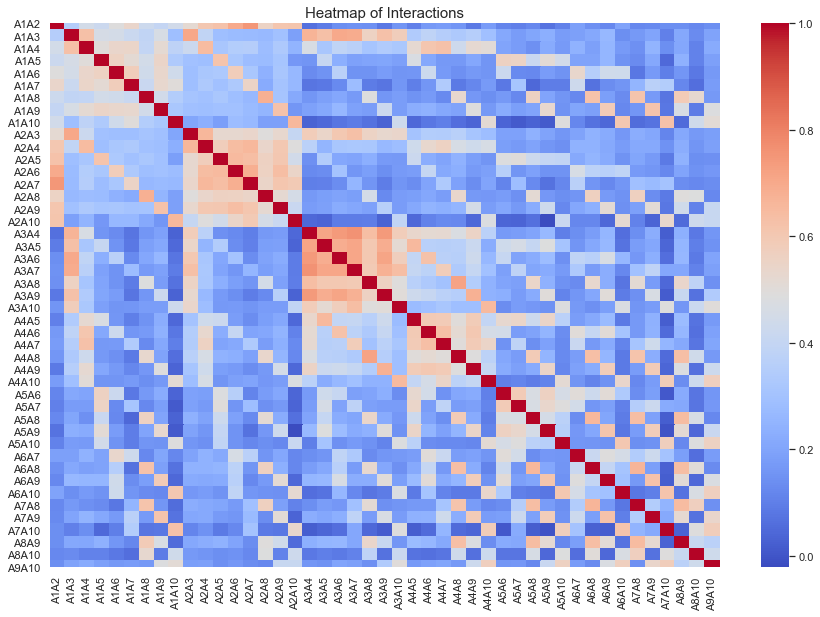

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df_comb.corr(),cmap='coolwarm')
plt.title('Heatmap of Interactions',fontsize=15)
plt.savefig('Interaction_heatmap');

In [29]:
# TRAIN TEST SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(df_comb, target, random_state=22,test_size=0.2)


In [30]:
# FIT SCALER TO DATA AND TRANSFORM TRAINING&TESTING DATA
scaler2 = StandardScaler()
scaler2.fit(X_train)

X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_comb.columns)
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_comb.columns)

In [31]:
X_test.head()

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A6,A5A7,A5A8,A5A9,A5A10,A6A7,A6A8,A6A9,A6A10,A7A8,A7A9,A7A10,A8A9,A8A10,A9A10
0,-1.042124,1.273429,1.017332,-1.049325,0.840681,0.791011,1.136371,-1.031421,-0.969536,-0.685344,-0.846649,-0.858670,-0.972876,-1.027880,-0.793884,-0.846649,-0.837708,1.071262,-0.817081,1.176965,1.156438,1.382027,-0.837708,-0.690766,-1.013841,0.914310,0.864724,1.164592,-1.031421,-0.867763,-1.193734,-1.210827,-0.930261,-1.074968,-0.889252,0.751343,1.034976,-1.152389,-0.982963,0.989743,-1.160506,-1.078688,-0.876925,-0.811246,-0.837708
1,0.959579,-0.785281,1.017332,0.952994,0.840681,-1.264205,1.136371,-1.031421,1.031421,-0.685344,1.181127,1.164592,1.027880,-1.027880,1.259630,-0.846649,1.193734,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,0.986347,0.914310,-1.156438,1.164592,-1.031421,1.152389,0.837708,-1.210827,1.074968,-1.074968,1.124541,-1.330950,1.034976,-1.152389,1.017332,-1.010363,-1.160506,-1.078688,-0.876925,1.232672,-0.837708
2,0.959579,1.273429,1.017332,0.952994,0.840681,0.791011,1.136371,0.969536,1.031421,1.459120,1.181127,1.164592,1.027880,0.972876,1.259630,1.181127,1.193734,1.071262,1.223868,1.176965,1.156438,1.382027,1.193734,1.447669,0.986347,0.914310,0.864724,1.164592,0.969536,1.152389,0.837708,0.825882,1.074968,0.930261,1.124541,0.751343,1.034976,0.867763,1.017332,0.989743,0.861693,0.927052,1.140349,1.232672,1.193734
3,-1.042124,-0.785281,-0.982963,-1.049325,-1.189512,-1.264205,-0.879994,-1.031421,-0.969536,-0.685344,1.181127,-0.858670,1.027880,0.972876,-0.793884,-0.846649,-0.837708,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,-1.013841,0.914310,0.864724,-0.858670,-1.031421,-0.867763,-1.193734,-1.210827,-0.930261,-1.074968,-0.889252,0.751343,-0.966206,-1.152389,-0.982963,-1.010363,-1.160506,-1.078688,-0.876925,-0.811246,-0.837708
4,0.959579,1.273429,1.017332,0.952994,-1.189512,0.791011,1.136371,0.969536,-0.969536,1.459120,1.181127,1.164592,-0.972876,0.972876,1.259630,1.181127,-0.837708,1.071262,1.223868,-0.849643,1.156438,1.382027,1.193734,-0.690766,0.986347,-1.093721,0.864724,1.164592,0.969536,-0.867763,-1.193734,0.825882,1.074968,0.930261,-0.889252,-1.330950,-0.966206,-1.152389,-0.982963,0.989743,0.861693,-1.078688,1.140349,-0.811246,-0.837708


In [32]:
# INSTANTIATE LINEAR REGRESSION MODEL AND FIT TO THE INTERACTION DATA
lm_2 = LinearRegression()
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 6.849816788042438


In [33]:
age_std = target.std()
# USE TRAINING MODEL TO PREDICT TEST
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Mean Absolute Error  Z:', test_rmse/age_std )
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
# TRAINING ERROR SHOULD BE LOWER THAN TESTING ERROR

Testing Root Mean Squared Error: 7.803763659694594
Mean Absolute Error  Z: 1.0416135438888852
Training:  6 vs. Testing:  7


In [34]:
# FOR OLS MODEL, ADD AGE COLUMN TO DF_COMB
df_comb['Age'] =df['Age'].apply(lambda x: x)

In [35]:
df_comb.head()

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A6,A5A7,A5A8,A5A9,A5A10,A6A7,A6A8,A6A9,A6A10,A7A8,A7A9,A7A10,A8A9,A8A10,A9A10,Age
1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,36
2,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,36
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,24
4,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20
5,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21


In [36]:
# OLS MODEL OF INTERACTION FEATURES
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

mlr_1 = ols(formula='Age~A1A2+A1A3+ A1A4+ A1A5+ A1A6+ A1A7+ A1A8+ A1A9+ A1A10+A2A3+ A2A4+ A2A5+ A2A6+ A2A7+ A2A8+ A2A9+ A2A10+ A3A4+A3A5+A3A6+A3A7+ A3A8+ A3A9+ A3A10+ A4A5+ A4A6+ A4A7+A4A8+ A4A9+ A4A10+ A5A6+ A5A7+ A5A8+ A5A9+ A5A10+A6A7+ A6A8+ A6A9+ A6A10+ A7A8+ A7A9+ A7A10+ A8A9+A8A10+ A9A10',data=df_comb).fit()
mlr_1.summary()

# 90 FEATURES
# ['A1A2'+ 'A1A3'+ 'A1A4'+ 'A1A5'+ 'A1A6'+ 'A1A7'+ 'A1A8'+ 'A1A9'+ 'A1A10'+
#        'A2A3'+ 'A2A4'+ 'A2A5'+ 'A2A6'+ 'A2A7'+ 'A2A8'+ 'A2A9'+ 'A2A10'+ 'A3A4'+
#        'A3A5'+ 'A3A6'+ 'A3A7'+ 'A3A8'+ 'A3A9'+ 'A3A10'+ 'A4A5'+ 'A4A6'+ 'A4A7'+
#        'A4A8'+ 'A4A9'+ 'A4A10'+ 'A5A6'+ 'A5A7'+ 'A5A8'+ 'A5A9'+ 'A5A10'+
#        'A6A7'+ 'A6A8'+ 'A6A9'+ 'A6A10'+ 'A7A8'+ 'A7A9'+ 'A7A10'+ 'A8A9'+
#        'A8A10'+ 'A9A10'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.284
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           6.80e-06
Time:                        21:14:47   Log-Likelihood:                -2447.5
No. Observations:                 728   AIC:                             4987.
Df Residuals:                     682   BIC:                             5198.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.8824      0.686     43.548      0.000      28.535      31.230
A1A2           1.2554      1.226      1.024      0.306      -1.151       3.662
A1A3           0.1252      1.490      0.084      0.933      -2.800       3.051
A1A4          -1.1355      1.483     -0.766      0.444      -4.047       1.776
A1A5          -0.8023      1.359     -0.591      0.555      -3.470       1.865
A1A6           1.4678      1.349      1.088      0.277      -1.181       4.117
A1A7           0.1964      1.393      0.141      0.888      -2.539       2.932
A1A8          -0.5247      1.316     -0.399      0.690      -3.108       2.059
A1A9           0.4827      1.350      0.358      0.721      -2.168       3.134
A1A10         -0.5730      1.261     -0.455      0.650      -3.048       1.902
A2A3           1.0930      1.388      0.787      0.431      -1.632       3.818
A2A4          -0.3868      1.363     -0.284      0.777      -3.062       2.288
A2A5           1.6671      1.293      1.290      0.198      -0.871       4.205
A2A6          -1.7006      1.294     -1.314      0.189      -4.242       0.841
A2A7          -0.8425      1.350     -0.624      0.533      -3.493       1.808
A2A8          -0.9077      1.206     -0.753      0.452      -3.276       1.460
A2A9          -0.1072      1.319     -0.081      0.935      -2.697       2.483
A2A10         -0.8793      1.202     -0.731      0.465      -3.240       1.482
A3A4           0.3337      1.276      0.261      0.794      -2.172       2.840
A3A5          -2.9643      1.341     -2.210      0.027      -5.598      -0.331
A3A6           0.6064      1.452      0.418      0.676      -2.244       3.457
A3A7           0.2348      1.593      0.147      0.883      -2.893       3.363
A3A8           0.8469      1.279      0.662      0.508      -1.665       3.358
A3A9          -2.0598      1.345     -1.532      0.126      -4.700       0.580
A3A10         -1.2488      1.294     -0.965      0.335      -3.790       1.293
A4A5           0.7008      1.333      0.526      0.599      -1.917       3.318
A4A6          -1.2000      1.395     -0.860      0.390      -3.939       1.539
A4A7          -0.5241      1.422     -0.369      0.713      -3.316       2.268
A4A8          -1.4274      1.312     -1.088      0.277      -4.003       1.148
A4A9          -1.2456      1.261     -0.988      0.324      -3.722       1.230
A4A10          2.2272      1.275      1.747      0.081      -0.276       4.731
A5A6          -1.0869      1.306     -0.833      0.405      -3.650       1.476
A5A7           2.0226      1.419      1.425      0.155      -0.764       4.809
A5A8          -0.4913      1.170     -0.420      0.675      -2.788       1.805
A5A9          -0.3874      1.247     -0.311      0.756      -2.835       2.060
A5A10         -0.6114      1.244     -0.492      0.623      -3.054       1.831
A6

## F test

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=5)
#run regression on x train and y train and return top 5 features
selector.fit(X_train, y_train)

SelectKBest(k=5, score_func=<function f_regression at 0x1a213eea60>)

In [38]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [39]:
list(removed_columns)

['A1A2',
 'A1A3',
 'A1A4',
 'A1A5',
 'A1A6',
 'A1A7',
 'A1A8',
 'A1A9',
 'A1A10',
 'A2A3',
 'A2A4',
 'A2A5',
 'A2A6',
 'A2A7',
 'A2A8',
 'A2A9',
 'A2A10',
 'A3A6',
 'A3A8',
 'A3A10',
 'A4A5',
 'A4A6',
 'A4A7',
 'A4A8',
 'A4A10',
 'A5A6',
 'A5A7',
 'A5A8',
 'A5A9',
 'A5A10',
 'A6A7',
 'A6A8',
 'A6A9',
 'A6A10',
 'A7A8',
 'A7A9',
 'A7A10',
 'A8A9',
 'A8A10',
 'A9A10']

In [40]:
list(selected_columns)

['A3A4', 'A3A5', 'A3A7', 'A3A9', 'A4A9']

In [41]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))


print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

Training Root Mean Squared Error: 7.14692721839106
Testing Root Mean Squared Error: 7.34498636872428
Original:  7.803763659694594 vs. KBest:  7.34498636872428


In [42]:
print(lm_kbest.intercept_)
print(lm_kbest.coef_)

28.280068728522338
[-0.01449297 -0.9356551  -0.17171549 -0.50226834 -0.97303345]


In [43]:
# OLS MODEL OF SIGNIFICANT PVALUE INTERACTIONS
X= sm.add_constant(X_train[selected_columns])
Y= y_train.values.reshape(-1,1)  
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     10.88
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           5.11e-10
Time:                        21:14:49   Log-Likelihood:                -1970.4
No. Observations:                 582   AIC:                             3953.
Df Residuals:                     576   BIC:                             3979.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2801      0.298     94.967      0.000      27.695      28.865
A3A4          -0.0145      0.562     -0.026      0.979      -1.119       1.090
A3A5          -0.9357      0.483     -1.935      0.053      -1.885       0.014
A3A7          -0.1717      0.499     -0.344      0.731      -1.152       0.809
A3A9          -0.5023      0.589     -0.852      0.394      -1.660       0.655
A4A9          -0.9730      0.418     -2.330      0.020      -1.793      -0.153
==============================================================================
Omnibus:                       44.720   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.616
Skew:                          -0.554   Prob(JB):                     4.12e-09
Kurtosis:                       2.396   Cond. No.                         4.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multi Linear Regression Model on features 'qchat_score','Ethnicity','Jaundice','Sex', and 'family_asd'

In [44]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Who completed the test,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Sex_m,family_asd_yes
1,2,1,1,0,0,0,1,1,0,0,0,36,4,family member,0,0,0,0,1,0,0,0,0,0,1,1,0
2,3,1,0,0,0,0,0,1,1,0,1,36,4,family member,0,0,0,0,0,0,0,1,0,0,1,1,0
3,4,1,1,1,1,1,1,1,1,1,1,24,10,family member,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,1,1,0,1,1,1,1,1,1,1,20,9,family member,0,0,0,0,1,0,0,0,0,0,0,0,1
5,6,1,1,0,0,1,1,1,1,1,1,21,8,family member,0,0,0,0,0,0,1,0,0,0,0,1,0


In [45]:
# CHANGE NAMES OF COLUMNS WITH SPACES TO MAKE IT EASIER
df_new = df.rename(columns={'Ethnicity_Native Indian': 'Ethnicity_Native_Indian', 'Ethnicity_White European':'Ethnicity_White_European', 'Ethnicity_middle eastern':'Ethnicity_middle_eastern', 'Who completed the test':'Who_completed_the_test','Ethnicity_south asian':'Ethnicity_south_asian'},inplace=True)
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Who_completed_the_test,Ethnicity_Latino,Ethnicity_Native_Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White_European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle_eastern,Ethnicity_mixed,Ethnicity_south_asian,Jaundice_yes,Sex_m,family_asd_yes
1,2,1,1,0,0,0,1,1,0,0,0,36,4,family member,0,0,0,0,1,0,0,0,0,0,1,1,0
2,3,1,0,0,0,0,0,1,1,0,1,36,4,family member,0,0,0,0,0,0,0,1,0,0,1,1,0
3,4,1,1,1,1,1,1,1,1,1,1,24,10,family member,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,1,1,0,1,1,1,1,1,1,1,20,9,family member,0,0,0,0,1,0,0,0,0,0,0,0,1
5,6,1,1,0,0,1,1,1,1,1,1,21,8,family member,0,0,0,0,0,0,1,0,0,0,0,1,0


In [46]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age', 'qchat_score', 'Who_completed_the_test', 'Ethnicity_Latino',
       'Ethnicity_Native_Indian', 'Ethnicity_Others', 'Ethnicity_Pacifica',
       'Ethnicity_White_European', 'Ethnicity_asian', 'Ethnicity_black',
       'Ethnicity_middle_eastern', 'Ethnicity_mixed', 'Ethnicity_south_asian',
       'Jaundice_yes', 'Sex_m', 'family_asd_yes'],
      dtype='object')

In [47]:
# SELECT COLUMNS FOR OUR FEATURES AND CREATE DATAFRAME, SELECT 'AGE' COLUMN AS TARGET TO MAKE IT EASIER TO CALL FOR REGRESSION
features = ['qchat_score','Ethnicity_Latino', 'Ethnicity_Native_Indian', 'Ethnicity_Others',
       'Ethnicity_Pacifica', 'Ethnicity_White_European', 'Ethnicity_asian',
       'Ethnicity_black', 'Ethnicity_middle_eastern', 'Ethnicity_mixed',
       'Ethnicity_south_asian', 'Jaundice_yes', 'Sex_m', 'family_asd_yes']
df_features = df[features]
target = df['Age']

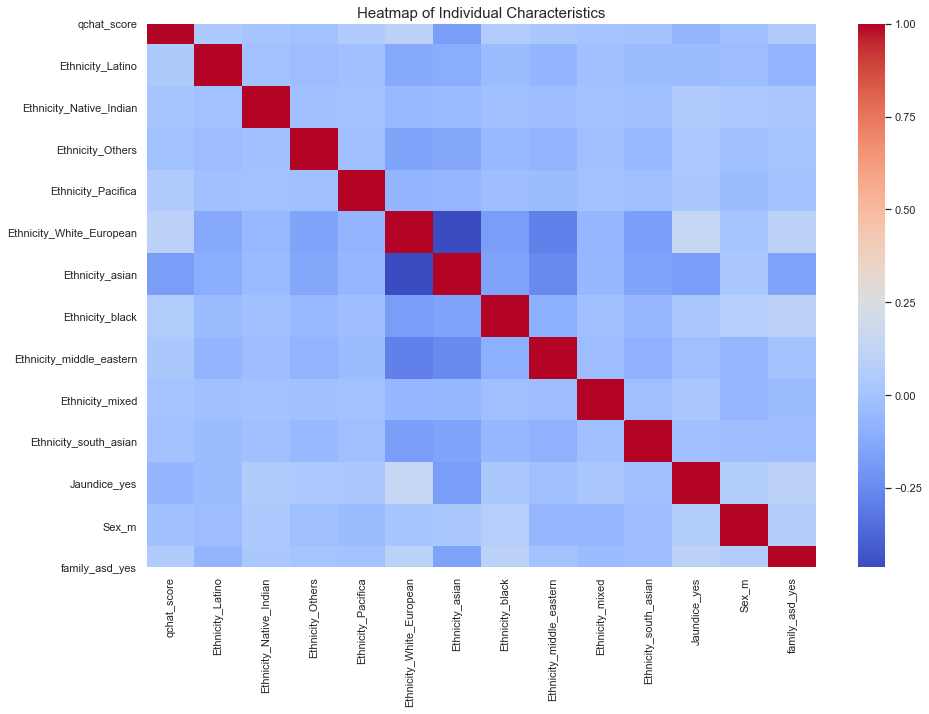

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df_features.corr(),cmap='coolwarm')
plt.title('Heatmap of Individual Characteristics',fontsize=15)
plt.savefig('individual_characteristics_heatmap')

In [49]:
# OLS MODEL OF FEATURES ON TARGET VARIABLE
from statsmodels.formula.api import ols
mlr_model2=ols(formula='Age~qchat_score+Ethnicity_Latino+Ethnicity_Native_Indian+Ethnicity_Others+Ethnicity_Pacifica+Ethnicity_White_European+Ethnicity_asian+Ethnicity_black+Ethnicity_middle_eastern+Ethnicity_mixed+Ethnicity_south_asian+Jaundice_yes+Sex_m+family_asd_yes',data=df).fit()
mlr_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.004
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.09e-06
Time:                        21:14:51   Log-Likelihood:                -2471.0
No. Observations:                 728   AIC:                             4972.
Df Residuals:                     713   BIC:                             5041.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   29.4380      1.745     16.866      0.000      26.011      32.865
qchat_score                 -0.5625      0.144     -3.905      0.000      -0.845      -0.280
Ethnicity_Latino             1.7613      2.121      0.830      0.407      -2.403       5.926
Ethnicity_Native_Indian      9.3076      4.418      2.107      0.035       0.633      17.982
Ethnicity_Others             4.6338      1.903      2.435      0.015       0.898       8.370
Ethnicity_Pacifica          -1.6690      3.070     -0.544      0.587      -7.697       4.359
Ethnicity_White_European     1.5074      1.413      1.067      0.287      -1.267       4.282
Ethnicity_asian              3.2391      1.438      2.253      0.025       0.416       6.062
Ethnicity_black             -0.0470      1.772     -0.027      0.979      -3.526       3.432
Ethnicity_middle_eastern     0.6937      1.532      0.453      0.651      -2.313       3.701
Ethnicity_mixed              3.5958      3.537      1.017      0.310      -3.348      10.539
Ethnicity_south_asian        3.1865      1.799      1.771      0.077      -0.345       6.719
Jaundice_yes                -1.3186      0.610     -2.160      0.031      -2.517      -0.120
Sex_m                        1.2957      0.619      2.094      0.037       0.081       2.511
family_asd_yes               0.3244      0.763      0.425      0.671      -1.173       1.822
==============================================================================
Omnibus:                       63.478   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.014
Skew:                          -0.549   Prob(JB):                     1.38e-11
Kurtosis:                       2.335   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# SPLIT INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=15,test_size=0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (582, 14) Target:  (582,)
Training set - Features:  (146, 14) Target:  (146,)


In [51]:
# SCALE DATA
scaler = StandardScaler()

# FITTING SCALER TO TRAINING DATA
scaler.fit(X_train)

#TRANSFORMING THE TRAINING DATA
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#TRANSFORMING THE TESTING DATA
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [52]:
age_std = target.std()
#INSTANTIATING LINEAR REGRESSION OBJECT
lm = LinearRegression()
# FITTING OBJECT TO THE DATA
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error  Z:', train_rmse/age_std )
print('Training Root Mean Squared Error:' , train_rmse)

Mean Absolute Error  Z: 0.9643348515974309
Training Root Mean Squared Error: 7.224792068828736


### Evaluate on the test set

In [53]:
#FITTING MODEL TO PREDICT ON TEST AND MAKE PREDICTION ON THE TESTING SET
y_pred = lm.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 7.320779200374499
Training:  7 vs. Testing:  7


## Feature Selection: Recursive Feature Elimination

In [54]:
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()
# SCORE FEATURES BY MSE AND FIT TO TRAINING SET
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

selector.fit(X_train, y_train)



RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [55]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [56]:
list(removed_rfe)

['Ethnicity_Latino',
 'Ethnicity_Native_Indian',
 'Ethnicity_Others',
 'Ethnicity_Pacifica',
 'Ethnicity_White_European',
 'Ethnicity_black',
 'Ethnicity_middle_eastern',
 'Ethnicity_mixed',
 'Ethnicity_south_asian',
 'Sex_m',
 'family_asd_yes']

In [57]:
list(selected_rfe)

['qchat_score', 'Ethnicity_asian', 'Jaundice_yes']

In [58]:
# INSTANTIATE LINEAR REGRESSION OBJECT AND FIT TO DATA
lm_rfe = LinearRegression()
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)
y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 7.358164869818336
Testing Root Mean Squared Error: 7.171442845015284
Original:  7.320779200374499 vs. RFE:  7.171442845015284


In [59]:
print(lm_rfe.intercept_)
print(lm_rfe.coef_)

28.269759450171822
[-1.29692647  0.89491755 -0.74495817]


In [60]:
# OLS MODEL OF SIGNIFICANT PVALUE INTERACTIONS
X= sm.add_constant(X_train[selected_rfe])
Y= y_train.values.reshape(-1,1)  
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     12.68
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           4.90e-08
Time:                        21:14:54   Log-Likelihood:                -1987.4
No. Observations:                 582   AIC:                             3983.
Df Residuals:                     578   BIC:                             4000.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              28.2698      0.306     92.367      0.000      27.669      28.871
qchat_score        -1.2969      0.312     -4.151      0.000      -1.911      -0.683
Ethnicity_asian     0.8949      0.317      2.823      0.005       0.272       1.517
Jaundice_yes       -0.7450      0.313     -2.383      0.018      -1.359      -0.131
==============================================================================
Omnibus:                       59.909   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.797
Skew:                          -0.577   Prob(JB):                     1.87e-10
Kurtosis:                       2.283   Cond. No.                         1.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""